<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO SEMANAL
#### Autor: RICARDO RELOZ


# EJERCICIO
## Diseñar un filtro pasabajos Chebyshev para obtener una atenuación de 48 dB para frecuencias mayores a 900 Hz, con una atenuación máxima de 0.4 dB desde continua hasta 300 Hz. ( Ancho de Banda reducido para canal Sub Lows )

### fs [Hz] : 900
### fp [Hz] : 300
### ⍺mín [dB] : 48
### ⍺Max [dB] : 0.4     

## 1. Determinar el orden del filtro y el parámetro ɛ.
## 2. Obtener la expresion completa de la Transferencia NORMALIZADA de T(s)
## 3. Obtener el diagrama de polos y ceros y graficar a mano alzada en forma cualitativa la respuesta de modulo y fase. 
## 4. Sintetizar el circuito NORMALIZADO utilizando estructuras Kerwin–Huelsman–Newcomb (KHN, también conocido como Variable de Estado ) saliendo desde la salida V3 como indica el siguiente circuito de referencia: 
    
<img src="./EJERCICIO.png" align="left" width="500" /> 


BONUS

    +10 💎 Simulación numérica en python
    +10 💎 Simulación Circuital con los valores DESNORMALIZADOS ( cumpliendo la plantilla pedida )
    +10  🍺 Presentación en jupyter notebook

## Ejercicio 1
Primero planteo sacando epsilon y el valor N del Chebyshev

<img src="./FOTO04.jpg" align="left" width="420" /> 
<img src="./FOTO05.jpg" align="left" width="420" /> 

## Ejercicio 2
Para obtener la H($) usare el programa de python, debido a la complejidad de las ecuaciones al ser de orden N = 5 
Pero usare las mismas ecuaciones para validar los valores

<img src="./FOTO06.jpg" align="left" width="500" /> 
<img src="./FOTO07.jpg" align="left" width="500" /> 
<img src="./FOTO08.jpg" align="left" width="500" /> 
<img src="./FOTO10.jpg" align="left" width="500" /> 

## Ejercicio 3
Del mismo programa de Python se botiene los valores para los polos y ceros, aunque tambien se puede hacer mediante la factorizacion

<img src="./FOTO09.jpg" align="left" width="600" /> 
<img src="./FOTO13.jpg" align="left" width="600" /> 

## Ejercicio 4
Para poder hacer la Normalizacion, se tuvo que tomar en cuenta ciertos valores
Para facilitar la escritura de calculos cree 4 valores

### w1 = 1 / R1*C1
### w2 = 1 / R2*C2
### k1 = R4 / R3
### k2 = R6 / R5

<img src="./FOTO01.jpg" align="left" width="600" /> 
<img src="./FOTO02.jpg" align="left" width="600" /> 
<img src="./VDE.png" align="left" width="600" /> 

### ASIGNACION DE VALORES

<img src="./FOTO14.jpg" align="left" width="600" /> 
<img src="./FOTO03.jpg" align="left" width="600" /> 
<img src="./FOTO15.jpg" align="left" width="600" /> 
<img src="./TABLA.png" align="left" width="600" /> 

### DESNORMALIZACION DE CIRCUITO

<img src="./FOTO16.jpg" align="left" width="600" /> 

### Simulacion en SPYDER normalizada

nn 2 - alfa_min_butter 9.452092 - alfa_min_cheby 14.606303
nn 3 - alfa_min_butter 18.532881 - alfa_min_cheby 29.761586
nn 4 - alfa_min_butter 28.020848 - alfa_min_cheby 45.067943
16*w**5 - 20*w**3 + 5*w


16*w**5 - 20*w**3 + 5*w

1/(24.6984182126554*w**10 - 61.7460455316385*w**8 + 54.0277898401837*w**6 - 19.295639228637*w**4 + 2.41195490357963*w**2 + 1)
1/(-24.6984182126554*s**10 - 61.7460455316385*s**8 - 54.0277898401837*s**6 - 19.295639228637*s**4 - 2.41195490357963*s**2 + 1)


1/(-24.6984182126554*s**10 - 61.7460455316385*s**8 - 54.0277898401837*s**6 - 19.295639228637*s**4 - 2.41195490357963*s**2 + 1)

[-24.69841821  -0.         -61.74604553  -0.         -54.02778984
  -0.         -19.29563923  -0.          -2.4119549   -0.
   1.        ]
[ 0.11932228+1.01949544j  0.11932228-1.01949544j -0.11932228+1.01949544j
 -0.11932228-1.01949544j  0.31238979+0.63008283j  0.31238979-0.63008283j
 -0.31238979+0.63008283j -0.31238979-0.63008283j -0.38613502+0.j
  0.38613502+0.j        ]
[-0.11932228+1.01949544j -0.11932228-1.01949544j -0.31238979+0.63008283j
 -0.31238979-0.63008283j -0.38613502+0.j        ]


#### Cheby_ord_5_rip_0.4_att_48

<IPython.core.display.Math object>

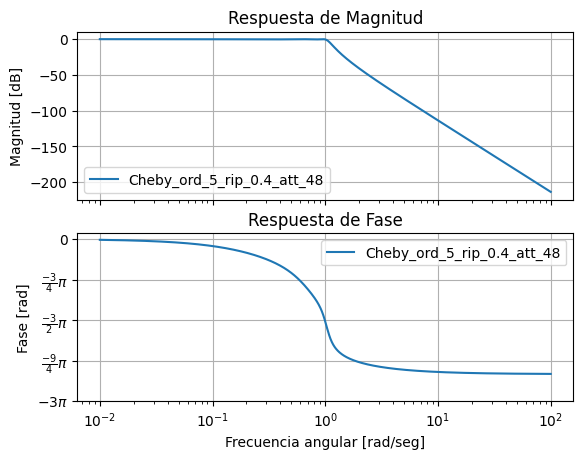

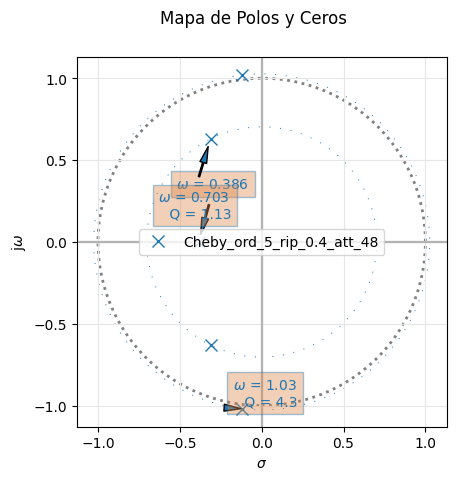

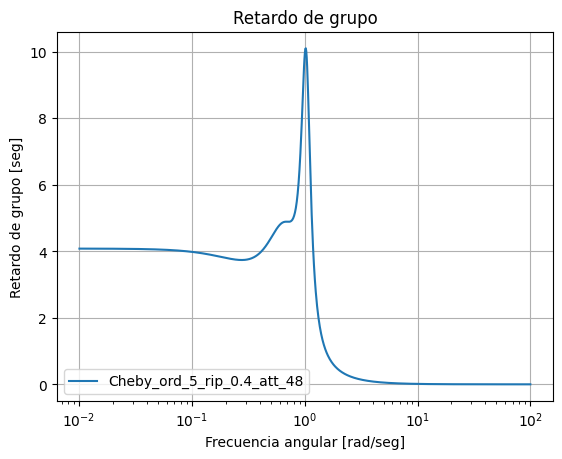

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp
from IPython.display import display

#%% datos del problema

alfa_max = 0.4 # dB
alfa_min = 48 # dB
ws = 3

#%% cuentas auxiliares

# epsilon cuadrado
eps_sq = 10**(alfa_max/10)-1
eps = np.sqrt(eps_sq)

for nn in range(2,5):
    
    alfa_min_c = 10*np.log10(1 + eps_sq * np.cosh(nn * np.arccosh(ws))**2 )
    # print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min_c) )

    alfa_min_b = 10*np.log10(1 + eps_sq * ws**(2*nn))
    print( 'nn {:d} - alfa_min_butter {:f} - alfa_min_cheby {:f}'.format(nn, alfa_min_b, alfa_min_c) )

    # repasar décadas y octavas!!
    # 20*np.log10([1, 2, 4, 8, 16])
    # 20*np.log10([1, 10, 100, 1000])    

#%% elijo un orden luego de iterar ...

nn = 5

#%% forma simbólica la más natural viniendo desde el lápiz y papel

chebn_expr = Chebyshev_polynomials(nn)

print(sp.expand(chebn_expr))
display(sp.expand(chebn_expr))
# preguntar si pueden visualizar LaTex, sino usar print

#
Tcsq_jw = 1/(1 + eps_sq*chebn_expr**2 )
print(sp.expand(Tcsq_jw))
# display(sp.expand(Tcsq_jw))

j = sp.I

Tcsq_s = Tcsq_jw.subs(w, s/j)
print(sp.expand(Tcsq_s))
display(sp.expand(Tcsq_s))


#%% forma numérica. mucho menos clara

# asumo que hice la recursión en papel
Cn3 = np.array([16., 0., -20., 0., 5., 0])
Cn3sq = np.polymul( Cn3, Cn3)
Tcsq_den_jw = np.polyadd( np.array([1.]), Cn3sq * eps_sq ) 

# convierto a s
Tcsq_den_s = Tcsq_den_jw * np.array([-1,-1,1,-1,-1,-1,1,-1,-1,-1,1])
print(Tcsq_den_s)

roots_Tcsq_den_s = np.roots(Tcsq_den_s)
print(roots_Tcsq_den_s)

# filtro T(s) reteniendo solo polos en el SPI
roots_Tcsq_den_s = roots_Tcsq_den_s[np.real(roots_Tcsq_den_s) < 0]
print(roots_Tcsq_den_s)

z,p,k = sig.cheb1ap(nn, alfa_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

#%% análisis de lo obtenido

filter_names = []
all_sys = []

this_aprox = 'Cheby'
this_label = this_aprox + '_ord_' + str(nn) + '_rip_' + str(alfa_max) + '_att_' + str(alfa_min)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

filter_names.append(this_label)
all_sys.append(sig.TransferFunction(num_cheb, den_cheb))

analyze_sys( all_sys, filter_names )

print_subtitle(this_label)
# factorizamos en SOS's
pretty_print_SOS(sos_cheb, mode='omegayq')



### ZOOM DE PYTHON

<img src="./Figure_1.png" align="left" width="800" /> 

## SIMULACION LTSPICE

### Circuito Normalizado
<img src="./Circuito1.png" align="left" width="900" /> 

### Grafico respuesta en frecuencia del circuito
<img src="./Grafico1A.png" align="left" width="900" /> 
<img src="./Grafico1B.png" align="left" width="900" /> 

### Circuito Desnormalizado fp = 300Hz fs = 900Hz
<img src="./Circuito2.png" align="left" width="900" /> 

### Grafico respuesta en frecuencia del circuito
<img src="./Grafico2A.png" align="left" width="900" /> 
<img src="./Grafico2B.png" align="left" width="900" /> 

## K
Se cumple el valor de ganancia, si se compara con el valor de spyder
<img src="./Kjust.png" align="left" width="900" /> 

## Conclusiones y Reflexiones
Calculo aparte, con la Variable de Estado, en la simulacion se pudo ver que las salidas V1 y V2 actuan como filtros pero de otro tipo, el V1 es la salida de un pasa Altos, la salida de V2 es la salida de Pasa Banda

En este trabajo, exploré el proceso de diseño de un filtro Chebyshev, a través de un análisis teórico y práctico, pude ajustar los parámetros de diseño para obtener un filtro con especificaciones precisas de atenuación y selectividad.